In [217]:
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

height = 50
width = 50
grid = np.zeros(shape=(height,width))

simulator = navier_stokes.Simulator(grid)

for j in range(20, 35):
    for i in range(20,30):
        simulator.force_field[(j,i)] = [2, 0]


[8.065095243940673, 0.5532556741363698, 0.030144543382936876, 0.002651061822783532, 0.00036678308276537645, 5.738967007278567e-05, 9.254770301557574e-06, 1.5086399745734375e-06, 2.471655280389524e-07, 4.0606703506885085e-08, 6.68279073480842e-09, 1.101078101008199e-09, 1.815616122041874e-10, 2.995600178811629e-11]
(0, 0)
3.0240012904663403e-06
0.10180117324204734
(0, 1)
2.007142632073683e-06
0.10226185310869468
(0, 2)
8.002153496877544e-07
0.10167125163806115
(0, 3)
-3.572535266392271e-07
0.10002982848661197
(0, 4)
-1.3322554028982053e-06
0.09733754359127636
(0, 5)
-2.0425611560155946e-06
0.09359538887327433
(0, 6)
-2.371966878493212e-06
0.08880855385267793
(0, 7)
-2.193839708501677e-06
0.08299159490872393
(0, 8)
-1.367140353723817e-06
0.07617702112281281
(0, 9)
2.6682913505451933e-07
0.06843029240694873
(0, 10)
2.8865003481697016e-06
0.059878343870755996
(0, 11)
6.689591338142342e-06
0.05076987512618702
(0, 12)
1.1967696297309621e-05
0.041616347479224707
(0, 13)
1.8812253183652858e-05

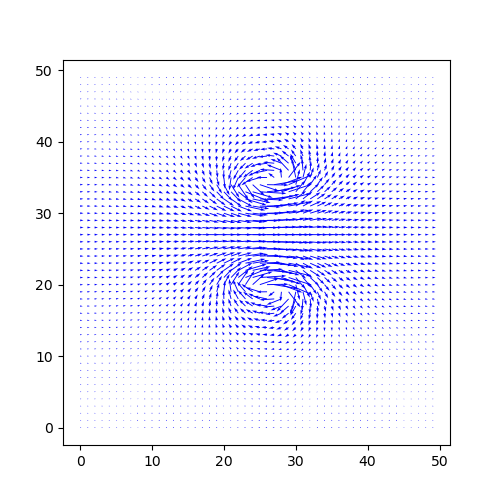

In [219]:

velocity_field = simulator.step(dt=1)
    
# Plotting junk
X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, velocity_field[:, :, 0], velocity_field[:, :, 1], color="b")
# Streamline
# dt = 80
# pos = np.array([15,9],dtype=np.float64)
# endpoint, steps = navier_stokes.trace(pos=pos, dt=dt, steps=10, velocity_field=velocity_field, savePath=True, dir=-1)
# xysteps = np.array([pos] + steps).T
# plt.plot(xysteps[0], xysteps[1], color="red", linewidth=1)
# for i, point in enumerate(steps):
#     plt.text(point[0], point[1] + 0.5, str(i), fontsize=7, ha='center', va='bottom')
#     plt.scatter(point[0], point[1], color='green', s=10)  # s sets the marker size
# plt.scatter(endpoint[0], endpoint[1], color='black', s=20)  # s sets the marker size

# # RK2
# endpoint = navier_stokes.rungeKutta2(pos, dt, vf=velocity_field)
# plt.plot([pos[0], endpoint[0]], [pos[1], endpoint[1]], color="magenta", linewidth=2)
sp = velocity_field
for fc in simulator.cells.flat:
    xdiff = (sp[fc.right.index][0] - sp[fc.left.index][0]) / 2
    ydiff = (sp[fc.up.index][1] - sp[fc.down.index][1]) / 2
    divergence = xdiff + ydiff
    print(fc.index)
    print(divergence)
    print(np.linalg.norm(sp[fc.index]))

plt.show()

In [66]:

vf = np.array([
    [[1,2], [2,4]],
    [[0,0], [1,-4]]
])

lengths = np.linalg.norm(vf, axis = 2)
nvf = vf/np.max(lengths)
print(nvf)
print(np.linalg.norm(nvf, axis=2))
# print(np.max(lengths))

[[[ 0.2236068   0.4472136 ]
  [ 0.4472136   0.89442719]]

 [[ 0.          0.        ]
  [ 0.2236068  -0.89442719]]]
[[0.5        1.        ]
 [0.         0.92195445]]
